### <h1> <center><strong>Data Preprocessing Sri Oryzaugur</strong></center> </h1>
<p><center style="color:#8B8000; font-family: Calibri;"><b>Mohammed Luqman Farhat Rumaiz - 2018130 - w1761767</b></center></p>

---

# **Importing Packages**

In [206]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings; 
warnings.simplefilter('ignore')

# **Data Wrangling**

## Nadu Retail Prices

This is the main variable in the historial data that we have, the other datasets will be external regressors in our multivariate models. This data ranges from 1996-2022 in a monthly frequency 

In [207]:
df = pd.read_csv('dataset/unprocessed/nadu_retail.csv')

df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1996,18.07,18.70,18.49,18.52,19.02,20.57,21.90,22.34,23.43,22.17,22.89,22.95
1,1997,22.27,20.24,18.71,19.21,20.65,20.50,20.94,21.92,23.23,24.08,26.33,26.55
2,1998,28.75,31.47,29.06,28.24,28.17,27.54,27.32,26.81,26.41,26.75,26.71,27.36
3,1999,28.75,31.47,29.06,28.24,28.17,27.54,27.32,26.81,26.41,26.75,26.71,27.36
4,2000,26.94,25.00,23.09,22.13,21.71,21.20,20.61,21.68,22.56,22.18,24.16,25.36


In [208]:
months = df.columns.tolist()
months = months[1:]

df = pd.melt(df, id_vars=['Year'], value_vars=months, var_name="Month", value_name='Price')
df

,Year,Month,Price
0,1996,Jan,18.07
1,1997,Jan,22.27
2,1998,Jan,28.75
3,1999,Jan,28.75
4,2000,Jan,26.94
...,...,...,...
319,2018,Dec,89.90
320,2019,Dec,103.29
321,2020,Dec,NaN
322,2021,Dec,138.50


In [209]:
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str))
df['Date'] = pd.to_datetime(df['Date'])

df.drop(['Year','Month'], axis=1, inplace=True)
df = df.sort_values(by='Date').reset_index(drop=True)
df = df.reindex(columns=['Date', 'Price'])

df.head()

,Date,Price
0,1996-01-01,18.07
1,1996-02-01,18.70
2,1996-03-01,18.49
3,1996-04-01,18.52
4,1996-05-01,19.02


In [210]:
# # edit the value at index '2022-11-01' in the 'Price' column
# df.loc[df['Date'] == '2022-11-01', 'Price'] = 220.00
# df.loc[df['Date'] == '2022-12-01', 'Price'] = 216.50

# # display the updated dataframe
# df.tail()

## Paddy Producer Prices

**We will be taking paddy farmgate prices from 03 of the highest paddy surplus districts in Sri Lanka**

*Data from Ampara exists, however there are several years of datapoints that are missing. Therefore it will not be used.*
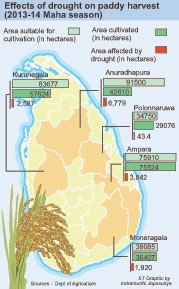

In [211]:
anuradhapura_producer_prices = pd.read_csv('dataset/unprocessed/anuradhapura_farm_gate.csv')
anuradhapura_producer_prices.head(anuradhapura_producer_prices.shape[0])

,Unnamed: 0,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,January,7.75,9.92,10.25,12.52,12.13,12.25,15.55,13.63,15.54,...,33.25,35.38,42.75,34.05,51.24,39.90,39.03,45.77,NaN,85.72
1,February,8.17,9.28,8.12,11.81,9.24,12.60,14.56,11.50,15.44,...,28.40,33.63,32.88,26.25,43.99,38.13,32.86,42.19,NaN,86.65
2,March,7.95,8.48,8.41,10.37,8.35,10.81,13.56,11.55,14.23,...,25.50,33.60,34.70,26.95,41.51,40.31,35.25,44.15,NaN,100.15
3,April,8.25,8.92,8.43,11.80,8.52,10.10,13.08,11.08,14.63,...,24.50,37.25,33.56,32.15,45.62,40.32,40.09,NaN,54.00,110.70
4,May,8.38,9.27,8.78,12.07,8.68,10.31,13.25,11.35,14.75,...,28.19,37.50,31.50,33.84,49.28,41.01,41.71,NaN,55.90,111.72
5,June,9.75,8.93,9.01,12.21,8.39,10.83,13.28,12.58,14.94,...,28.50,39.30,31.13,33.35,50.25,37.80,40.24,NaN,57.00,131.55
6,July,10.85,9.50,9.10,12.35,8.22,11.76,12.60,11.50,16.63,...,26.10,39.75,25.61,31.63,50.36,36.60,42.46,48.50,51.24,124.15
7,August,11.37,10.48,8.87,11.84,9.00,12.36,12.75,10.79,17.48,...,25.42,40.50,28.59,32.04,50.61,37.60,43.58,46.46,50.90,112.60
8,September,11.34,11.27,8.46,12.03,9.66,12.06,11.85,11.38,17.94,...,26.37,40.18,30.05,32.70,50.87,37.94,45.50,NaN,56.00,110.50
9,October,10.71,12.15,9.09,11.84,9.74,12.54,12.91,11.88,17.00,...,29.42,42.00,32.35,38.80,51.77,41.54,49.98,NaN,65.55,NaN


In [212]:
def trim_month_rows(df):
    return df[df.index <= 11]

In [213]:
anuradhapura_producer_prices.rename(columns={'Unnamed: 0':'Month'}, inplace=True)

# Only keep rows before the 11th index as we don't any unwanted rows after that
anuradhapura_producer_prices = trim_month_rows(anuradhapura_producer_prices)

anuradhapura_producer_prices.head(anuradhapura_producer_prices.shape[0])

,Month,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,January,7.75,9.92,10.25,12.52,12.13,12.25,15.55,13.63,15.54,...,33.25,35.38,42.75,34.05,51.24,39.90,39.03,45.77,NaN,85.72
1,February,8.17,9.28,8.12,11.81,9.24,12.60,14.56,11.50,15.44,...,28.40,33.63,32.88,26.25,43.99,38.13,32.86,42.19,NaN,86.65
2,March,7.95,8.48,8.41,10.37,8.35,10.81,13.56,11.55,14.23,...,25.50,33.60,34.70,26.95,41.51,40.31,35.25,44.15,NaN,100.15
3,April,8.25,8.92,8.43,11.80,8.52,10.10,13.08,11.08,14.63,...,24.50,37.25,33.56,32.15,45.62,40.32,40.09,NaN,54.00,110.70
4,May,8.38,9.27,8.78,12.07,8.68,10.31,13.25,11.35,14.75,...,28.19,37.50,31.50,33.84,49.28,41.01,41.71,NaN,55.90,111.72
5,June,9.75,8.93,9.01,12.21,8.39,10.83,13.28,12.58,14.94,...,28.50,39.30,31.13,33.35,50.25,37.80,40.24,NaN,57.00,131.55
6,July,10.85,9.50,9.10,12.35,8.22,11.76,12.60,11.50,16.63,...,26.10,39.75,25.61,31.63,50.36,36.60,42.46,48.50,51.24,124.15
7,August,11.37,10.48,8.87,11.84,9.00,12.36,12.75,10.79,17.48,...,25.42,40.50,28.59,32.04,50.61,37.60,43.58,46.46,50.90,112.60
8,September,11.34,11.27,8.46,12.03,9.66,12.06,11.85,11.38,17.94,...,26.37,40.18,30.05,32.70,50.87,37.94,45.50,NaN,56.00,110.50
9,October,10.71,12.15,9.09,11.84,9.74,12.54,12.91,11.88,17.00,...,29.42,42.00,32.35,38.80,51.77,41.54,49.98,NaN,65.55,NaN


In [214]:
# Just as we melted in the retail dataframe, the month columns with each year from each row of the
# first column. The process is repeated here except that the year is the column in this case and the
# month are rows in the first column

months = anuradhapura_producer_prices['Month']
months

years = anuradhapura_producer_prices.columns.tolist()
years = years[1:]
years

anuradhapura_producer_prices = pd.melt(anuradhapura_producer_prices, id_vars=['Month'], value_vars=years, var_name="Year", value_name='Anuradhapura_Producer_Price')
anuradhapura_producer_prices['Date'] = pd.to_datetime(anuradhapura_producer_prices['Year'].astype(str) + '-' + anuradhapura_producer_prices['Month'].astype(str))
anuradhapura_producer_prices['Date'] = pd.to_datetime(anuradhapura_producer_prices['Date'])

anuradhapura_producer_prices.drop(['Year','Month'], axis=1, inplace=True)
anuradhapura_producer_prices = anuradhapura_producer_prices.sort_values(by='Date').reset_index(drop=True)
anuradhapura_producer_prices = anuradhapura_producer_prices.reindex(columns=['Date', 'Anuradhapura_Producer_Price'])

anuradhapura_producer_prices.head()

,Date,Anuradhapura_Producer_Price
0,1996-01-01,7.75
1,1996-02-01,8.17
2,1996-03-01,7.95
3,1996-04-01,8.25
4,1996-05-01,8.38


In [215]:
kurunegala_producer_prices = pd.read_csv('dataset/unprocessed/kurunegala_farm_gate.csv')
kurunegala_producer_prices.head(kurunegala_producer_prices.shape[0])

,Unnamed: 0,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,January,7.90,10.05,10.65,13.20,11.59,11.80,14.82,13.02,17.56,...,34.50,35.42,42.48,32.73,NaN,43.917,40.458,48.615,53.250,83.380
1,February,8.26,8.14,8.27,12.41,8.86,11.14,15.65,12.00,15.04,...,30.39,31.84,32.03,27.76,NaN,38.583,30.708,44.250,46.563,79.688
2,March,7.85,7.86,8.58,10.37,7.81,10.59,11.56,12.03,13.78,...,23.55,34.57,33.38,23.20,NaN,42.375,34.042,46.833,48.667,100.767
3,April,8.01,8.68,8.52,11.43,8.35,10.20,11.97,12.08,15.06,...,28.45,37.24,34.56,33.10,NaN,45.500,41.967,NaN,51.917,112.988
4,May,8.50,9.13,8.96,12.45,8.42,10.40,12.47,11.40,15.23,...,32.86,37.33,34.90,35.52,NaN,38.267,44.208,50.411,55.000,115.900
5,June,9.24,8.78,9.22,12.08,8.21,10.75,12.97,12.09,15.40,...,30.53,40.23,35.10,35.30,50.667,39.750,41.858,52.260,55.500,141.950
6,July,10.74,9.41,9.03,12.53,8.06,11.73,12.02,11.74,16.11,...,28.67,40.73,30.60,32.90,50.130,36.467,42.050,48.700,50.917,126.988
7,August,11.16,9.91,8.92,11.55,8.63,12.51,11.84,11.21,17.46,...,26.28,41.42,28.60,31.26,51.000,35.667,43.600,46.340,51.292,113.863
8,September,11.37,10.35,8.19,11.83,9.18,11.61,11.53,12.03,18.82,...,27.45,41.42,31.60,31.55,46.750,33.467,NaN,NaN,49.625,108.008
9,October,10.58,11.69,9.01,11.76,8.74,11.75,12.24,12.28,18.74,...,31.97,42.59,31.90,37.40,50.833,37.907,49.708,51.000,63.692,NaN


In [216]:
kurunegala_producer_prices.rename(columns={'Unnamed: 0':'Month'}, inplace=True)

# Only keep rows before the 11th index as we don't any unwanted rows after that
kurunegala_producer_prices = trim_month_rows(kurunegala_producer_prices)

kurunegala_producer_prices.head(kurunegala_producer_prices.shape[0])

,Month,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,January,7.90,10.05,10.65,13.20,11.59,11.80,14.82,13.02,17.56,...,34.50,35.42,42.48,32.73,NaN,43.917,40.458,48.615,53.250,83.380
1,February,8.26,8.14,8.27,12.41,8.86,11.14,15.65,12.00,15.04,...,30.39,31.84,32.03,27.76,NaN,38.583,30.708,44.250,46.563,79.688
2,March,7.85,7.86,8.58,10.37,7.81,10.59,11.56,12.03,13.78,...,23.55,34.57,33.38,23.20,NaN,42.375,34.042,46.833,48.667,100.767
3,April,8.01,8.68,8.52,11.43,8.35,10.20,11.97,12.08,15.06,...,28.45,37.24,34.56,33.10,NaN,45.500,41.967,NaN,51.917,112.988
4,May,8.50,9.13,8.96,12.45,8.42,10.40,12.47,11.40,15.23,...,32.86,37.33,34.90,35.52,NaN,38.267,44.208,50.411,55.000,115.900
5,June,9.24,8.78,9.22,12.08,8.21,10.75,12.97,12.09,15.40,...,30.53,40.23,35.10,35.30,50.667,39.750,41.858,52.260,55.500,141.950
6,July,10.74,9.41,9.03,12.53,8.06,11.73,12.02,11.74,16.11,...,28.67,40.73,30.60,32.90,50.130,36.467,42.050,48.700,50.917,126.988
7,August,11.16,9.91,8.92,11.55,8.63,12.51,11.84,11.21,17.46,...,26.28,41.42,28.60,31.26,51.000,35.667,43.600,46.340,51.292,113.863
8,September,11.37,10.35,8.19,11.83,9.18,11.61,11.53,12.03,18.82,...,27.45,41.42,31.60,31.55,46.750,33.467,NaN,NaN,49.625,108.008
9,October,10.58,11.69,9.01,11.76,8.74,11.75,12.24,12.28,18.74,...,31.97,42.59,31.90,37.40,50.833,37.907,49.708,51.000,63.692,NaN


In [217]:
# Just as we melted in the retail dataframe, the month columns with each year from each row of the
# first column. The process is repeated here except that the year is the column in this case and the
# month are rows in the first column

months = kurunegala_producer_prices['Month']
months

years = kurunegala_producer_prices.columns.tolist()
years = years[1:]
years

kurunegala_producer_prices = pd.melt(kurunegala_producer_prices, id_vars=['Month'], value_vars=years, var_name="Year", value_name='Kurunegala_Producer_Price')
kurunegala_producer_prices['Date'] = pd.to_datetime(kurunegala_producer_prices['Year'].astype(str) + '-' + kurunegala_producer_prices['Month'].astype(str))
kurunegala_producer_prices['Date'] = pd.to_datetime(kurunegala_producer_prices['Date'])

kurunegala_producer_prices.drop(['Year','Month'], axis=1, inplace=True)
kurunegala_producer_prices = kurunegala_producer_prices.sort_values(by='Date').reset_index(drop=True)
kurunegala_producer_prices = kurunegala_producer_prices.reindex(columns=['Date', 'Kurunegala_Producer_Price'])

kurunegala_producer_prices.head()

,Date,Kurunegala_Producer_Price
0,1996-01-01,7.90
1,1996-02-01,8.26
2,1996-03-01,7.85
3,1996-04-01,8.01
4,1996-05-01,8.50


In [218]:
polonnaruwa_producer_prices = pd.read_csv('dataset/unprocessed/polonnaruwa_farm_gate.csv')
polonnaruwa_producer_prices.head(kurunegala_producer_prices.shape[0])

,Unnamed: 0,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,January,8.18,11.17,11.09,14.22,11.53,12.75,17.48,13.27,14.90,...,33.60,36.37,NaN,36.83,50.34,45.95,NaN,49.47,55.92,87.75
1,February,8.76,8.69,7.98,11.98,9.88,13.31,17.06,12.67,14.82,...,26.18,33.99,35.17,29.99,41.22,35.81,30.94,43.30,45.50,91.56
2,March,7.99,9.80,7.93,10.51,8.19,10.20,12.27,10.99,13.84,...,25.47,34.63,36.99,28.09,40.92,42.56,35.62,45.05,50.07,108.81
3,April,8.29,8.37,8.33,11.63,8.09,9.82,12.53,11.21,13.94,...,27.00,36.84,31.15,33.38,43.82,41.19,40.13,NaN,60.25,117.50
4,May,8.34,8.80,9.13,12.86,8.04,10.65,12.76,11.47,14.07,...,29.54,39.10,32.39,35.67,50.34,41.56,43.92,54.00,63.58,117.35
5,June,9.57,8.88,9.37,12.80,7.87,11.16,12.83,11.34,14.76,...,28.43,41.58,32.56,34.88,52.45,NaN,41.41,53.75,57.25,138.20
6,July,10.27,9.67,9.50,13.19,8.08,12.73,12.12,11.13,15.33,...,27.14,40.85,31.83,32.58,49.77,NaN,42.74,45.73,47.75,130.50
7,August,11.90,10.81,8.78,11.78,9.32,12.83,12.56,11.08,16.11,...,26.28,42.01,28.31,32.02,46.72,NaN,NaN,45.52,52.73,122.93
8,September,10.40,10.67,8.58,11.86,9.36,11.36,11.82,10.94,16.61,...,27.24,44.92,28.06,34.35,48.34,40.00,49.63,NaN,60.40,117.00
9,October,10.08,12.39,9.77,12.23,9.88,12.22,12.56,11.80,16.62,...,31.00,NaN,30.17,39.79,54.50,42.47,51.31,NaN,70.08,NaN


In [219]:
polonnaruwa_producer_prices.rename(columns={'Unnamed: 0':'Month'}, inplace=True)

# Only keep rows before the 11th index as we don't any unwanted rows after that
polonnaruwa_producer_prices = trim_month_rows(polonnaruwa_producer_prices)

polonnaruwa_producer_prices.head(polonnaruwa_producer_prices.shape[0])

,Month,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,January,8.18,11.17,11.09,14.22,11.53,12.75,17.48,13.27,14.90,...,33.60,36.37,NaN,36.83,50.34,45.95,NaN,49.47,55.92,87.75
1,February,8.76,8.69,7.98,11.98,9.88,13.31,17.06,12.67,14.82,...,26.18,33.99,35.17,29.99,41.22,35.81,30.94,43.30,45.50,91.56
2,March,7.99,9.80,7.93,10.51,8.19,10.20,12.27,10.99,13.84,...,25.47,34.63,36.99,28.09,40.92,42.56,35.62,45.05,50.07,108.81
3,April,8.29,8.37,8.33,11.63,8.09,9.82,12.53,11.21,13.94,...,27.00,36.84,31.15,33.38,43.82,41.19,40.13,NaN,60.25,117.50
4,May,8.34,8.80,9.13,12.86,8.04,10.65,12.76,11.47,14.07,...,29.54,39.10,32.39,35.67,50.34,41.56,43.92,54.00,63.58,117.35
5,June,9.57,8.88,9.37,12.80,7.87,11.16,12.83,11.34,14.76,...,28.43,41.58,32.56,34.88,52.45,NaN,41.41,53.75,57.25,138.20
6,July,10.27,9.67,9.50,13.19,8.08,12.73,12.12,11.13,15.33,...,27.14,40.85,31.83,32.58,49.77,NaN,42.74,45.73,47.75,130.50
7,August,11.90,10.81,8.78,11.78,9.32,12.83,12.56,11.08,16.11,...,26.28,42.01,28.31,32.02,46.72,NaN,NaN,45.52,52.73,122.93
8,September,10.40,10.67,8.58,11.86,9.36,11.36,11.82,10.94,16.61,...,27.24,44.92,28.06,34.35,48.34,40.00,49.63,NaN,60.40,117.00
9,October,10.08,12.39,9.77,12.23,9.88,12.22,12.56,11.80,16.62,...,31.00,NaN,30.17,39.79,54.50,42.47,51.31,NaN,70.08,NaN


In [220]:
# Just as we melted in the retail dataframe, the month columns with each year from each row of the
# first column. The process is repeated here except that the year is the column in this case and the
# month are rows in the first column

months = polonnaruwa_producer_prices['Month']
months

years = polonnaruwa_producer_prices.columns.tolist()
years = years[1:]
years

polonnaruwa_producer_prices = pd.melt(polonnaruwa_producer_prices, id_vars=['Month'], value_vars=years, var_name="Year", value_name='Polonnaruwa_Producer_Price')
polonnaruwa_producer_prices['Date'] = pd.to_datetime(polonnaruwa_producer_prices['Year'].astype(str) + '-' + polonnaruwa_producer_prices['Month'].astype(str))
polonnaruwa_producer_prices['Date'] = pd.to_datetime(polonnaruwa_producer_prices['Date'])

polonnaruwa_producer_prices.drop(['Year','Month'], axis=1, inplace=True)
polonnaruwa_producer_prices = polonnaruwa_producer_prices.sort_values(by='Date').reset_index(drop=True)
polonnaruwa_producer_prices = polonnaruwa_producer_prices.reindex(columns=['Date', 'Polonnaruwa_Producer_Price'])

polonnaruwa_producer_prices.head()

,Date,Polonnaruwa_Producer_Price
0,1996-01-01,8.18
1,1996-02-01,8.76
2,1996-03-01,7.99
3,1996-04-01,8.29
4,1996-05-01,8.34


In [221]:
anuradhapura_producer_prices['Producer_Price'] = anuradhapura_producer_prices['Anuradhapura_Producer_Price']
kurunegala_producer_prices['Producer_Price'] = kurunegala_producer_prices['Kurunegala_Producer_Price']
polonnaruwa_producer_prices['Producer_Price'] = polonnaruwa_producer_prices['Polonnaruwa_Producer_Price']

# concatenate the dataframes
combined_producer_prices = pd.concat([anuradhapura_producer_prices, kurunegala_producer_prices, polonnaruwa_producer_prices], axis=0)

# calculate the row-wise averages for the 'Price' column
avg_producer_prices = combined_producer_prices.groupby('Date')['Producer_Price'].mean()

# missing_values = combined_producer_prices.groupby('Date')['Producer_Price'].apply(lambda x: x.isna().sum())

# create a new dataframe with the row-wise averages for each date
combined_producer_prices = pd.DataFrame({
    'Date': avg_producer_prices.index,
    'Producer_Price': avg_producer_prices.values,
})

combined_producer_prices['Date'] = pd.to_datetime(combined_producer_prices['Date'])
combined_producer_prices

,Date,Producer_Price
0,1996-01-01,7.943333
1,1996-02-01,8.396667
2,1996-03-01,7.930000
3,1996-04-01,8.183333
4,1996-05-01,8.406667
...,...,...
319,2022-08-01,116.464333
320,2022-09-01,111.836000
321,2022-10-01,NaN
322,2022-11-01,NaN


In [222]:
anuradhapura_producer_prices.drop('Producer_Price', axis=1, inplace=True)
kurunegala_producer_prices.drop('Producer_Price', axis=1, inplace=True)
polonnaruwa_producer_prices.drop('Producer_Price', axis=1, inplace=True)

## Paddy Production (Maha, Yala and Total)

**In Sri Lanka, "Maha" and "Yala" are two major rice cultivation seasons, which are determined by the monsoon rains.**

**The Maha season typically runs from October/November to February/March, while the Yala season runs from April/May to September. However, the exact timing of the seasons may vary slightly from year to year depending on the weather conditions.**

**During the Maha season, the north and eastern parts of Sri Lanka receive the majority of their rainfall, while during the Yala season, the southwestern monsoon brings rainfall to the rest of the country. These seasonal rains are crucial for the cultivation of rice, which is a staple food in Sri Lanka.**


In [223]:
paddy_production = pd.read_csv('dataset/unprocessed/total_paddy_production.csv')
paddy_production.rename(columns={'Date': 'Year'}, inplace=True)
paddy_production

,Year,Maha,Yala,Total
0,1996,1333.60,731.500,2065.100
1,1997,1459.60,783.700,2243.300
2,1998,1784.20,912.800,2697.000
3,1999,1738.80,1123.300,2862.100
4,2000,1781.20,1077.600,2858.800
5,2001,1614.00,1083.000,2696.900
6,2002,1774.50,1089.100,2863.700
7,2003,1896.80,1172.200,3069.000
8,2004,1669.70,958.200,2627.800
9,2005,2012.70,1233.500,3246.200


In [224]:
# Convert the 'Year' column to datetime format
paddy_production['Year'] = pd.to_datetime(paddy_production['Year'], format='%Y')
paddy_production

# Create a list of monthly dates between January 1996 and December 2022
dates = pd.date_range(start='1996-01-01', end='2022-12-31', freq='MS')

# Create a new DataFrame with the monthly dates as the index
monthly_df = pd.DataFrame(index=dates)

# Merge the year and paddy production data with the monthly DataFrame
monthly_dates = pd.date_range(start='1996-01-01', end='2022-12-01', freq='MS')
monthly_df['Year'] = monthly_df.index.strftime('%Y')
monthly_df = monthly_df.reset_index().rename(columns={'index': 'Date'})

# Merge the year and paddy production data with the monthly DataFrame
monthly_df['Year'] = pd.to_datetime(monthly_df['Year'])
monthly_df = pd.merge(monthly_df, paddy_production, on='Year')


def classify_yaha_mala(row):
    date = row["Date"]
    
    if date.month >= 10 or date.month <= 4:
        return row["Maha"]
    else:
        return row["Yala"]
    
def classify_total_production(row):
    return row["Total"]
    
# Fill the missing values
monthly_df["Production"] = monthly_df.apply(classify_yaha_mala, axis=1)
monthly_df["Production_Total"] = monthly_df.apply(classify_total_production, axis=1)

# Drop unwanted Columns
monthly_df.drop(['Year', 'Maha', 'Yala', 'Total'], axis=1, inplace=True)

monthly_df.head(50)

,Date,Production,Production_Total
0,1996-01-01,1333.6,2065.1
1,1996-02-01,1333.6,2065.1
2,1996-03-01,1333.6,2065.1
3,1996-04-01,1333.6,2065.1
4,1996-05-01,731.5,2065.1
5,1996-06-01,731.5,2065.1
6,1996-07-01,731.5,2065.1
7,1996-08-01,731.5,2065.1
8,1996-09-01,731.5,2065.1
9,1996-10-01,1333.6,2065.1


## Exchange Rate (USD to LKR)


In [225]:
exchange_rate = pd.read_csv('dataset/unprocessed/exchange_rate.csv')
exchange_rate

,Date,Price,Open,High,Low,Vol.,Change %
0,02/01/2023,366.000,364.000,368.500,360.50,NaN,-0.41%
1,01/01/2023,367.500,367.500,369.000,360.50,NaN,0.00%
2,12/01/2022,367.500,368.500,370.380,362.00,NaN,-0.27%
3,11/01/2022,368.500,365.500,370.500,360.50,NaN,1.52%
4,10/01/2022,363.000,365.495,370.635,355.78,NaN,-0.68%
...,...,...,...,...,...,...,...
321,05/01/1996,54.950,54.800,54.950,54.80,NaN,0.39%
322,04/01/1996,54.735,54.700,54.735,54.70,NaN,1.96%
323,03/01/1996,53.685,53.650,53.685,53.65,NaN,0.00%
324,02/01/1996,53.685,53.650,53.685,53.65,NaN,0.00%


In [226]:
# Convert 'Date' into datetime
exchange_rate['Date'] = pd.to_datetime(exchange_rate['Date'], format='%m/%d/%Y')

# Sort the values based on the date
exchange_rate = exchange_rate.sort_values(by='Date').reset_index(drop=True)

# Set 'Date' column as index
exchange_rate = exchange_rate.set_index('Date')

# Convert column to float from string  
exchange_rate['Exchange_Rate'] = exchange_rate['Price'].astype(float)

exchange_rate = exchange_rate.drop(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], axis=1)
exchange_rate

,Exchange_Rate
Date,
1996-01-01,53.685
1996-02-01,53.685
1996-03-01,53.685
1996-04-01,54.735
1996-05-01,54.950
...,...
2022-10-01,363.000
2022-11-01,368.500
2022-12-01,367.500


## **Scraped Data**

**Scraped data are already preprocessed in the notebooks that scraped the data in the *data_scrapes* dir**

Data was scraped from the following websites:
[**Fuel Prices**](www.ceypetco.gov.lk)

### **Fuel Prices (CEYPETCO)**

In [227]:
fuel_prices = pd.read_csv('dataset/unprocessed/fuel_prices.csv')
fuel_prices

,Date,LAD
0,1990-03-01,9.6
1,1990-04-01,9.6
2,1990-05-01,9.6
3,1990-06-01,9.6
4,1990-07-01,9.6
...,...,...
391,2022-10-01,430.0
392,2022-11-01,430.0
393,2022-12-01,420.0
394,2023-01-01,405.0


In [228]:
fuel_prices['Date'] = pd.to_datetime(fuel_prices['Date'], format='%Y-%m-%d')
fuel_prices.rename(columns={'LAD': 'Fuel_Price'}, inplace=True)

## Merge the processed data

In [229]:
# Lets now merge the different dataframes into one for our multivariate analysis

df = pd.merge(df, anuradhapura_producer_prices, on='Date')
df = pd.merge(df, kurunegala_producer_prices, on='Date')
df = pd.merge(df, polonnaruwa_producer_prices, on='Date')
df = pd.merge(df, combined_producer_prices, on='Date')
df = pd.merge(df, monthly_df, on='Date')
df = pd.merge(df, exchange_rate, on='Date')
df = pd.merge(df, fuel_prices, on='Date')

# df = pd.merge(df, exchange_rate, on='Date')
df.head()

,Date,Price,Anuradhapura_Producer_Price,Kurunegala_Producer_Price,Polonnaruwa_Producer_Price,Producer_Price,Production,Production_Total,Exchange_Rate,Fuel_Price
0,1996-01-01,18.07,7.75,7.90,8.18,7.943333,1333.6,2065.1,53.685,12.4
1,1996-02-01,18.70,8.17,8.26,8.76,8.396667,1333.6,2065.1,53.685,12.4
2,1996-03-01,18.49,7.95,7.85,7.99,7.930000,1333.6,2065.1,53.685,12.4
3,1996-04-01,18.52,8.25,8.01,8.29,8.183333,1333.6,2065.1,54.735,12.4
4,1996-05-01,19.02,8.38,8.50,8.34,8.406667,731.5,2065.1,54.950,12.4


## Filling Missing Values

In [230]:
df.isna().sum()

Date                            0
Price                           8
Anuradhapura_Producer_Price    15
Kurunegala_Producer_Price      13
Polonnaruwa_Producer_Price     23
Producer_Price                  5
Production                      0
Production_Total                0
Exchange_Rate                   0
Fuel_Price                      0
dtype: int64

### Missing values in Retail Prices

In [231]:
df['Missing_Values_Retail'] = (df.groupby('Date')['Price'].apply(lambda x: x.isna().sum())).values

In [232]:
# iterate through each row in avg_df
for index, row in df.iterrows():
    # check if the 'Average Price' value is greater than 200
    if row['Missing_Values_Retail'] > 0:
        # print the date and average price
        print(f"Date: {row['Date']}, Missing_Values_Retail: {row['Missing_Values_Retail']}")

Date: 2017-10-01 00:00:00, Missing_Values_Retail: 1
Date: 2020-04-01 00:00:00, Missing_Values_Retail: 1
Date: 2020-05-01 00:00:00, Missing_Values_Retail: 1
Date: 2020-10-01 00:00:00, Missing_Values_Retail: 1
Date: 2020-11-01 00:00:00, Missing_Values_Retail: 1
Date: 2020-12-01 00:00:00, Missing_Values_Retail: 1
Date: 2022-11-01 00:00:00, Missing_Values_Retail: 1
Date: 2022-12-01 00:00:00, Missing_Values_Retail: 1


### Missing values in Producer Prices

In [233]:
df['Missing_Values_Producer'] = (combined_producer_prices.groupby('Date')['Producer_Price'].apply(lambda x: x.isna().sum())).values

In [234]:
# iterate through each row in avg_df
for index, row in df.iterrows():
    # check if the 'Average Price' value is greater than 200
    if row['Missing_Values_Producer'] > 0:
        # print the date and average price
        print(f"Date: {row['Date']}, Missing_Values_Producer: {row['Missing_Values_Producer']}")

Date: 2020-04-01 00:00:00, Missing_Values_Producer: 1
Date: 2020-09-01 00:00:00, Missing_Values_Producer: 1
Date: 2022-10-01 00:00:00, Missing_Values_Producer: 1
Date: 2022-11-01 00:00:00, Missing_Values_Producer: 1
Date: 2022-12-01 00:00:00, Missing_Values_Producer: 1


In [235]:
df['Price'] = df['Price'].interpolate(option='spline')
df['Anuradhapura_Producer_Price'] = df['Anuradhapura_Producer_Price'].interpolate(option='spline')
df['Kurunegala_Producer_Price'] = df['Kurunegala_Producer_Price'].interpolate(option='spline')
df['Polonnaruwa_Producer_Price']= df['Polonnaruwa_Producer_Price'].interpolate(option='spline')
df['Producer_Price']= df['Polonnaruwa_Producer_Price'].interpolate(option='spline')

Using a mathematical function, the method of **spline interpolation** estimates values that minimize overall curvature, thus obtaining a smooth surface passing through the input points.

In [236]:
df.isna().sum()

Date                           0
Price                          0
Anuradhapura_Producer_Price    0
Kurunegala_Producer_Price      0
Polonnaruwa_Producer_Price     0
Producer_Price                 0
Production                     0
Production_Total               0
Exchange_Rate                  0
Fuel_Price                     0
Missing_Values_Retail          0
Missing_Values_Producer        0
dtype: int64

In [237]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

df.shape

(324, 14)

In [238]:
df

,Date,Price,Anuradhapura_Producer_Price,Kurunegala_Producer_Price,Polonnaruwa_Producer_Price,Producer_Price,Production,Production_Total,Exchange_Rate,Fuel_Price,Missing_Values_Retail,Missing_Values_Producer,Year,Month
0,1996-01-01,18.07,7.75,7.900,8.18,8.18,1333.600,2065.100,53.685,12.4,0,0,1996,1
1,1996-02-01,18.70,8.17,8.260,8.76,8.76,1333.600,2065.100,53.685,12.4,0,0,1996,2
2,1996-03-01,18.49,7.95,7.850,7.99,7.99,1333.600,2065.100,53.685,12.4,0,0,1996,3
3,1996-04-01,18.52,8.25,8.010,8.29,8.29,1333.600,2065.100,54.735,12.4,0,0,1996,4
4,1996-05-01,19.02,8.38,8.500,8.34,8.34,731.500,2065.100,54.950,12.4,0,0,1996,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,2022-08-01,239.24,112.60,113.863,122.93,122.93,1461.675,3392.875,357.880,430.0,0,0,2022,8
320,2022-09-01,228.44,110.50,108.008,117.00,117.00,1461.675,3392.875,365.500,430.0,0,0,2022,9
321,2022-10-01,224.78,110.50,108.008,117.00,117.00,1931.200,3392.875,363.000,430.0,0,1,2022,10
322,2022-11-01,224.78,110.50,108.008,117.00,117.00,1931.200,3392.875,368.500,430.0,1,1,2022,11


# **EDA**

In [239]:
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# Create Line plot
fig = px.line(df, x='Date', y='Price')

# Add legend
fig.update_layout(showlegend=True)

# Display the plot
fig.show()

In [240]:
# Create Line plot
fig = px.line(df, x='Date', y='Production')
fig.add_scatter(x=df['Date'], y=df['Production_Total'], name='Production_Total')

# Add legend
fig.update_layout(showlegend=True)

# Display the plot
fig.show()

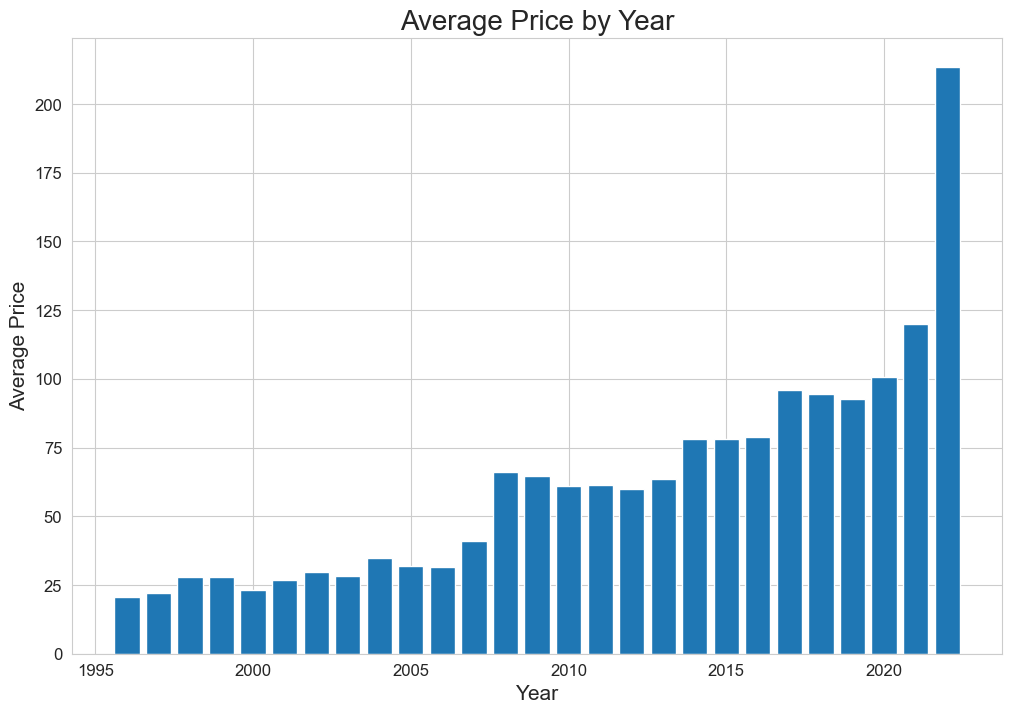

In [241]:
# Group the data by Year and calculate the mean price for each year
df_grouped = df.groupby('Year')['Price'].mean()

# Plot the mean prices as a bar plot using seaborn
plt.figure(figsize=(12,8))
plt.bar(df_grouped.index, df_grouped.values)

# Set the x-axis label, y-axis label, and title
plt.xlabel('Year', fontsize=15)
plt.ylabel('Average Price', fontsize=15)
plt.title('Average Price by Year', fontsize=20)

# Set the font for the x-tick labels and the y-tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

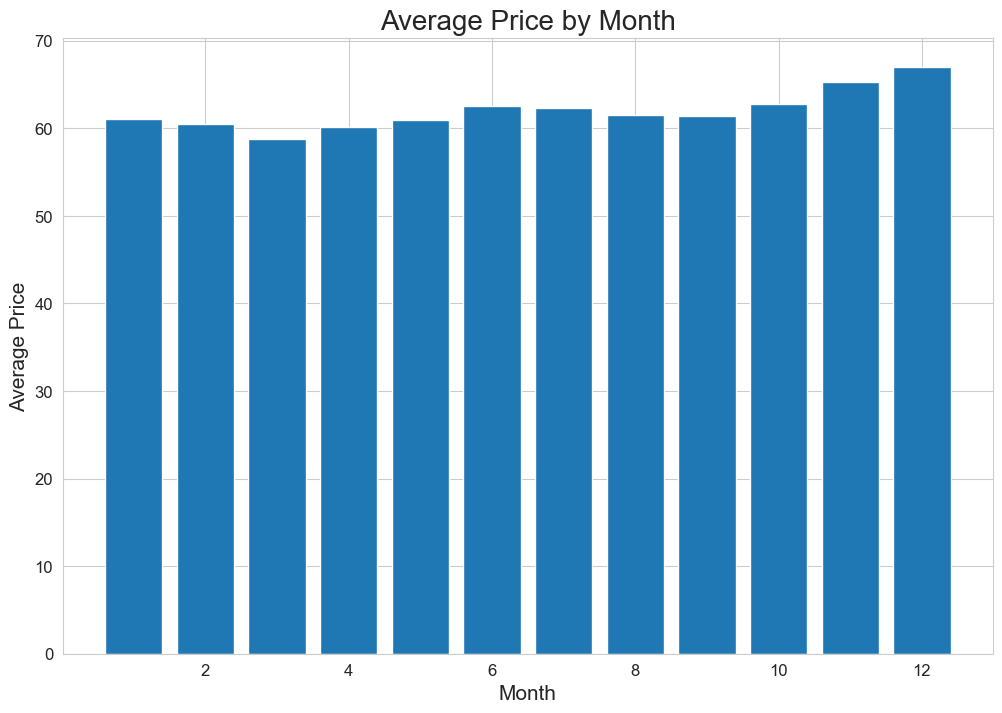

In [242]:
# Group the data by Year and calculate the mean price for each year
df_grouped = df.groupby('Month')['Price'].mean()

plt.figure(figsize=(12,8))
plt.bar(df_grouped.index, df_grouped.values)

# Set the x-axis label, y-axis label, and title
plt.xlabel('Month', fontsize=15)
plt.ylabel('Average Price', fontsize=15)
plt.title('Average Price by Month', fontsize=20)

# Set the font for the x-tick labels and the y-tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

The rice market has a delicate system of price determination that is associated with availability in the market. It is connected to seasonal harvests of Maha and Yala leading to high fluctuation of prices over certain months of the year. From January, the prices of paddy and rice decline gradually and reach their lowest in March with the major Maha harvest. It increases slightly from April and undergoes a minor slump during July-August when the minor Yala harvest reaches the market. The rise of the prices of all types of rice is quite sharp from September onwards reaching the peak in December and begin to decline again in January continuing the cycle. The difficulties faced by consumers due to a sharp rise in rice prices during September-January is one of the most politically sensitive issues in the country.

https://www.ips.lk/talkingeconomics/2021/10/07/rising-price-of-rice-in-sri-lanka-the-roots-and-remedies/

In [243]:
fig = px.line(exchange_rate, x=exchange_rate.index, y='Exchange_Rate', title='Exchange Rate (USD to LKR)')
fig.show()

In [244]:
fig = px.line(fuel_prices, x='Date', y='Fuel_Price', title='Fuel Prices (CEYPETCO)')
fig.show()

In [245]:
df.reset_index(drop=False, inplace=True)
df.drop(['Year','Month', 'Missing_Values_Retail', 'Missing_Values_Producer'], axis=1, inplace=True)
df.to_csv('dataset/processed_data.csv',index=False)